In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data = pd.read_csv('BankNote_Authentication.csv')

In [ ]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
data.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [ ]:
data['class'].value_counts()

,count
class,
0,762
1,610


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


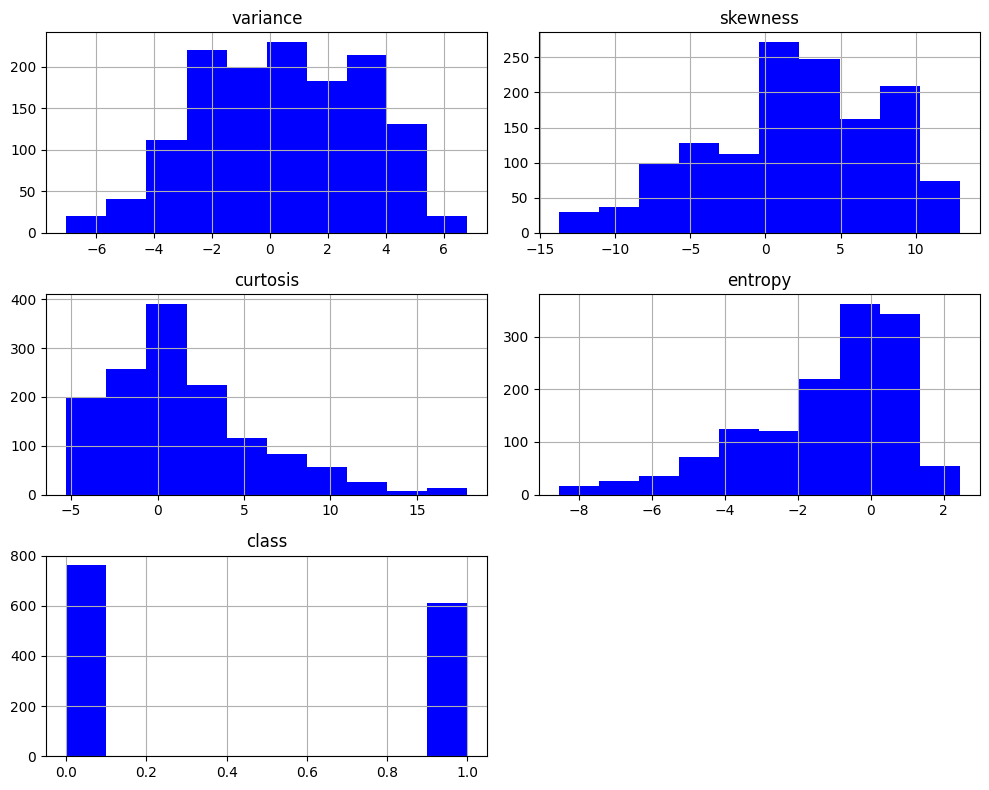

In [ ]:
numerical_data = data.select_dtypes(include='number')
numerical_data.hist(figsize=(10, 8),color = 'b')
plt.tight_layout()
plt.show()

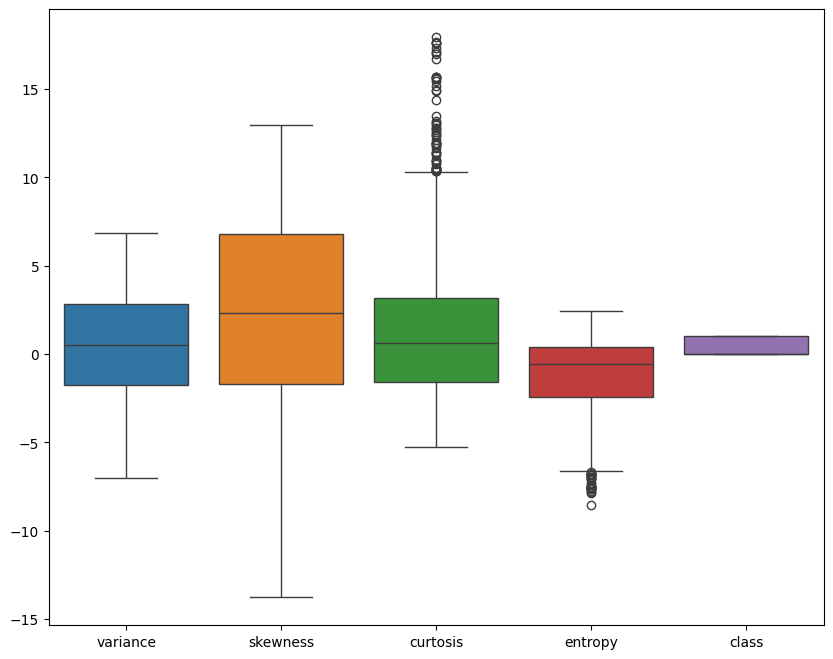

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(numerical_data)
plt.show()

In [ ]:
data.duplicated().sum()

24

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.isnull().sum()

,0
variance,0
skewness,0
curtosis,0
entropy,0
class,0


In [ ]:
data['class'].value_counts()

,count
class,
0,738
1,610


In [ ]:
# shuffle data
data = data.sample(frac=1)
data = data.reset_index(drop=True)  # reet index after shuffling

In [ ]:
data.head()

,variance,skewness,curtosis,entropy,class
0,-0.29858,2.4769,-2.95120,-0.66165,1
1,0.83292,7.5404,0.65005,-0.92544,0
2,-1.38850,12.5026,0.69118,-7.54870,0
3,3.23030,7.8384,-3.53480,-1.21510,0
4,-1.18040,11.5093,0.15565,-6.81940,0


In [ ]:
data.tail()

,variance,skewness,curtosis,entropy,class
1343,-1.52200,-6.6383,5.749100,-0.10691,1
1344,-2.48240,-7.3046,6.839000,-0.59053,1
1345,-5.30120,7.3915,0.029699,-7.39870,1
1346,-0.63298,-5.1277,4.562400,1.47970,1
1347,4.21640,9.4607,-4.928800,-5.23660,0


In [ ]:
X = data.drop('class', axis=1) # use all columns except 'target' as features
Y = data['class']

In [ ]:
X.shape, Y.shape

((1348, 4), (1348,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 75, 100, 150],         # Focus on fewer trees due to dataset size
    'max_depth': [3, 5, 7, 10],         # Explore shallow and fully grown trees
    'max_features': ['sqrt', 'log2'],     # Use subsets of features for splits
    'min_samples_split': [2, 5, 10]       # Control node splits
}


In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

In [ ]:
# Perform Grid Search
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50, 75, 100, 150]},
             scoring='accuracy', verbose=1)

In [ ]:
# Extract results
results = pd.DataFrame(grid_search.cv_results_)

In [ ]:
# Select relevant columns for meta-dataset
meta_dataset = results[['param_n_estimators', 'param_max_depth', 'param_max_features', 'param_min_samples_split',
                        'mean_test_score']]

In [ ]:
# Rename columns for clarity
meta_dataset.rename(columns={
    'param_n_estimators': 'n_estimators',
    'param_max_depth': 'max_depth',
    'param_max_features': 'max_features',
    'param_min_samples_split': 'min_samples_split',
    'mean_test_score': 'accuracy'
}, inplace=True)

<ipython-input-27-584a53431e15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_dataset.rename(columns={


In [ ]:
# Add meta-features of the dataset
meta_features = {
    'num_features': X.shape[1],
    'num_samples': X.shape[0],
    'class_imbalance_ratio': Y.value_counts().max() / Y.value_counts().min(),
    'num_classes': len(Y.unique())
}

In [ ]:
for feature, value in meta_features.items():
    meta_dataset[feature] = value

<ipython-input-29-efeef45cdee3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_dataset[feature] = value
<ipython-input-29-efeef45cdee3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_dataset[feature] = value
<ipython-input-29-efeef45cdee3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [ ]:
# Display the meta-dataset
print(meta_dataset.head())

   n_estimators  max_depth max_features  min_samples_split  accuracy  \
0            25          3         sqrt                  2  0.955490   
1            50          3         sqrt                  2  0.952522   
2            75          3         sqrt                  2  0.954500   
3           100          3         sqrt                  2  0.952522   
4           150          3         sqrt                  2  0.952522   

   num_features  num_samples  class_imbalance_ratio  num_classes  
0             4         1348               1.209836            2  
1             4         1348               1.209836            2  
2             4         1348               1.209836            2  
3             4         1348               1.209836            2  
4             4         1348               1.209836            2  


In [ ]:
# Save the meta-dataset to a CSV file for later use
meta_dataset.to_csv('meta_dataset_bankNote.csv', index=False)